IMPORTING'S



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
pd.read_csv("magic04.data")


,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
cols = ["flength","fwidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,flength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()


array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"]=="g").astype(int)


In [6]:
df.head()


,flength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [7]:
df["class"].unique()



array([1, 0])

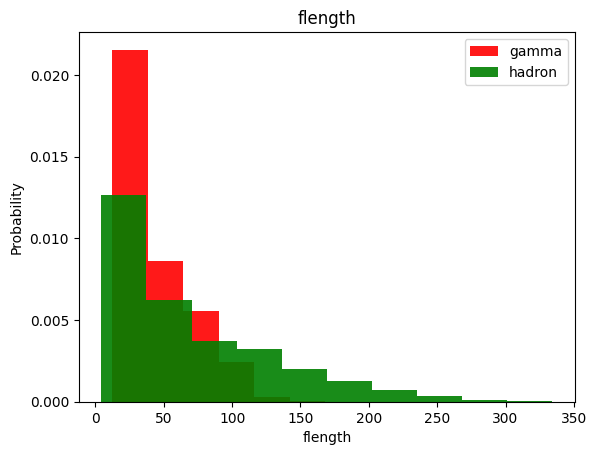

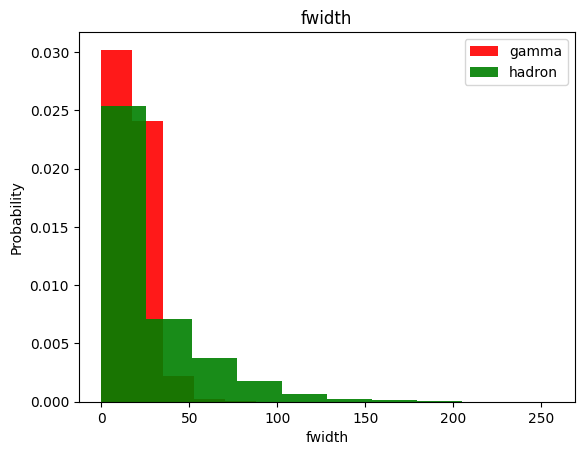

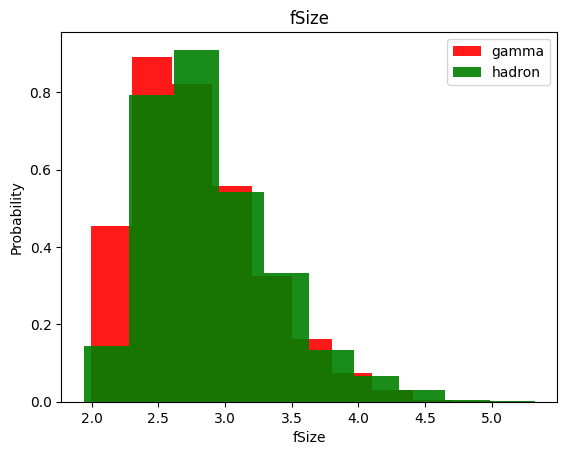

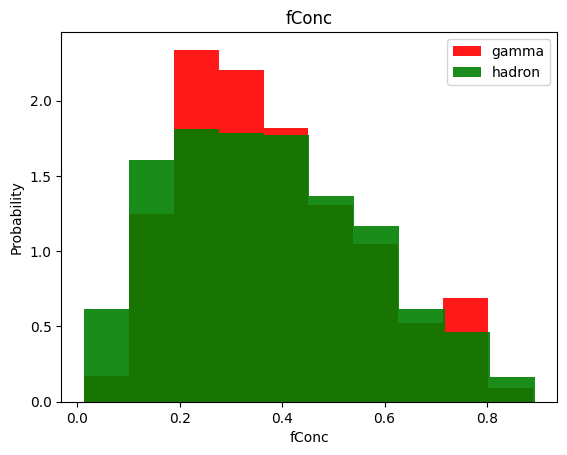

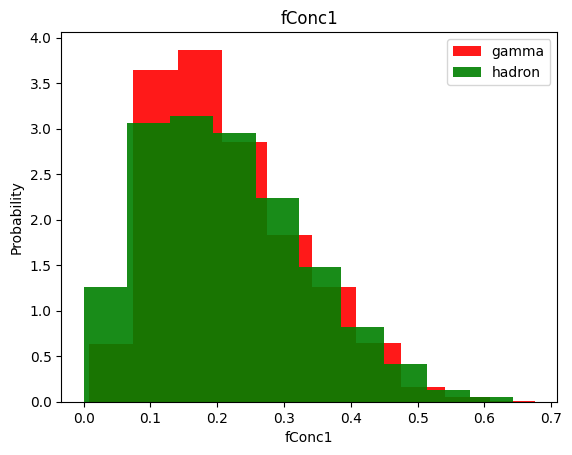

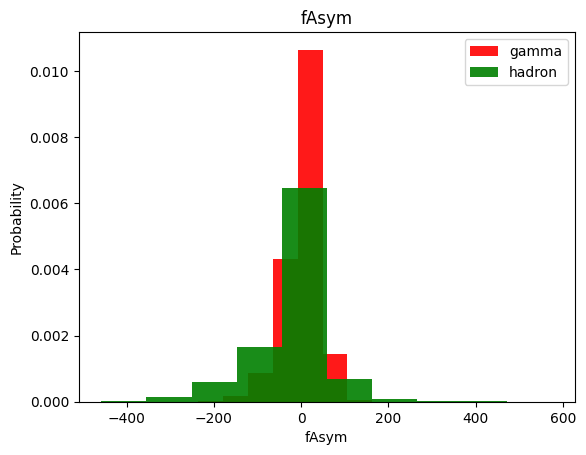

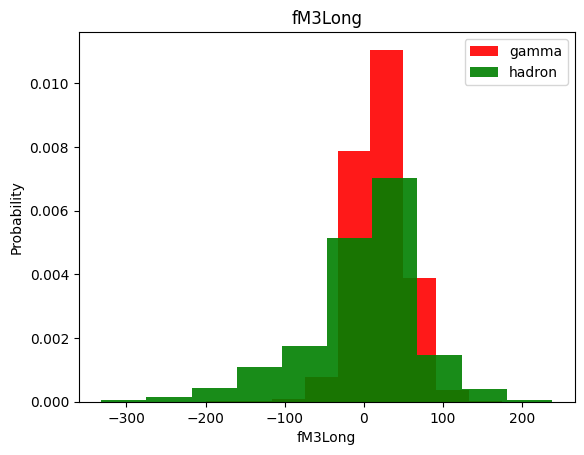

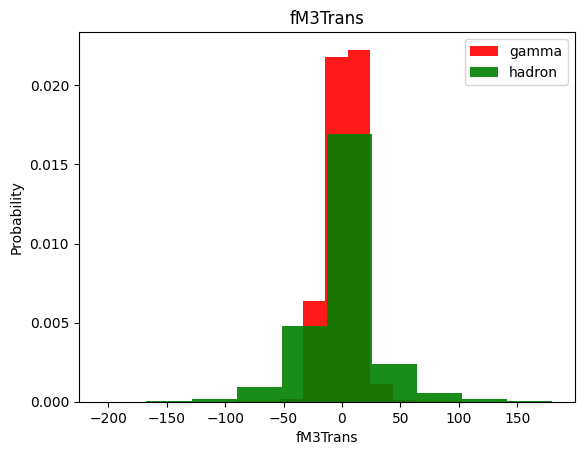

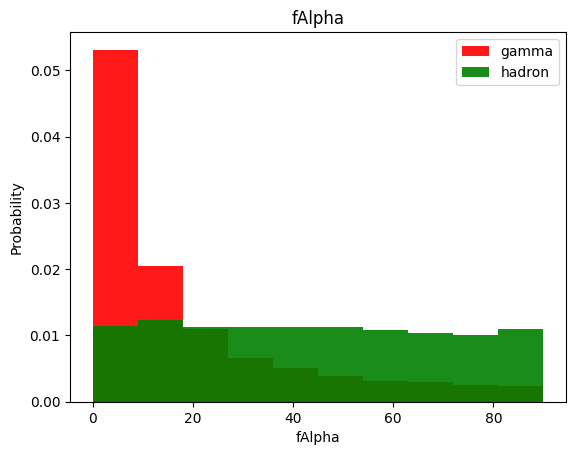

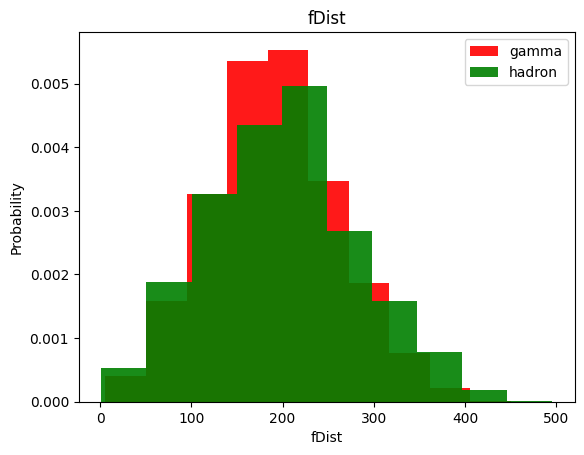

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="red", label= "gamma", alpha=0.9 , density=True)
  plt.hist(df[df["class"]==0][label], color="green", label= "hadron", alpha=0.9 , density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

Train, Valid, Test Datasets


In [18]:
train , valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # frac is used to shuffle the dataframe so that all the data is used

In [10]:
def scale_dataset(dataframe):
  x = dataframe[dataframe.cols[:-1]].values
  y = dataframe[dataframe.cols[-1]].values

  scaler = StandardScaler()  #  creating instance of preprocessing module
  X = scaler.fit_transform(X)  # fit : computes the mean and standard deviation for ech feature of 'x' , transform : applies the transformed data

  data= np.hStack((X, np.reshape(y, (-1,1)))) #change into 2 dimension array

  return data,X,y

In [11]:
train

,flength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7258,87.3533,27.0798,3.6356,0.2006,0.1003,66.8263,85.9163,-15.1756,1.4660,276.8560,1
18485,20.3612,6.9041,2.4074,0.5513,0.2962,-40.0515,6.2928,10.0156,87.0836,155.8387,0
15832,96.3798,32.4251,3.2082,0.2513,0.1546,-37.4629,84.1927,23.3146,10.8360,317.8891,0
5204,36.0699,15.0459,2.7976,0.2948,0.1602,2.2124,22.3355,-10.2402,4.5385,210.7140,1
3058,33.1206,22.4333,2.8657,0.3270,0.2159,-2.0536,14.5536,16.4965,14.2293,169.6060,1
...,...,...,...,...,...,...,...,...,...,...,...
16371,68.0256,11.6532,3.0809,0.3321,0.2123,-92.8597,-7.3949,-13.1525,38.7345,274.4498,0
13671,23.5034,7.2791,2.6198,0.4206,0.2400,-34.4282,-12.4968,5.9887,74.9493,141.9685,0
12636,303.5676,38.3100,3.5777,0.1476,0.0812,-449.9526,200.3148,-19.2293,71.5012,86.0291,0
7216,41.0149,13.6674,2.7716,0.3046,0.1565,14.2980,28.0699,-7.1876,6.2970,223.4410,1


In [12]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))



7397
4015


In [13]:
def scale_dataset(dataframe, oversample = False): #Oversample used for vectorisation or
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if oversample:
    ros =RandomOverSampler()
    X, y = ros.fit_resample(X,y) # resample helps to add the records to overcome the inconsistency

  data= np.hstack((X, np.reshape(y, (-1,1))))

  return data,X,y

In [14]:
train, X_train, y_train = scale_dataset(train, oversample = True)

In [15]:
len(y_train)

14794

In [16]:
sum(y_train==1) # equally balanced

7397

In [17]:
sum(y_train==0) # equally balanced

7397

In [19]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

K - Nearest neighbours


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [24]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1305
           1       0.86      0.87      0.87      2499

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [26]:
print(knn_model)

KNeighborsClassifier()


Naive- Bayes Algorithm


In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred = nb_model.predict(X_test)

In [30]:
y_pred


array([1, 0, 1, ..., 0, 1, 1])

In [31]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [34]:
print(X_train)

[[ 0.93461926  0.08817682  0.6789164  ...  0.58249502 -0.56143824
   1.23815788]
 [ 0.57393792  0.85374839  2.43732717 ...  0.76624075 -0.89781681
   0.5709098 ]
 [-0.58722462 -0.56636149 -0.18118044 ...  0.64350736 -0.32643261
  -0.03347441]
 ...
 [-0.91660923 -0.68235272 -0.87545757 ...  0.42641818 -0.63079989
  -1.11510106]
 [ 1.66132409  1.23408793  0.50906267 ...  1.32139028 -1.03749556
   0.65226007]
 [-0.45046385 -0.36681032 -0.55846804 ...  0.41041447  0.0239681
   0.35347377]]


In [35]:
print(y_train)

[1 1 0 ... 0 0 0]


In [36]:
y_pred = lg_model.predict(X_test)

In [37]:
print(y_pred)

[1 0 1 ... 0 1 1]


In [38]:

print(y_test)

[1 1 1 ... 0 1 1]


In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1426
           1       0.82      0.86      0.84      2378

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.78      3804
weighted avg       0.79      0.79      0.79      3804



### **SVM**

In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [42]:
svm_predict  = svm_model.predict(X_test)
svm_predict

array([1, 0, 1, ..., 0, 1, 1])

In [43]:
print(y_test)

[1 1 1 ... 0 1 1]


In [44]:
print(classification_report(svm_predict, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1306
           1       0.90      0.90      0.90      2498

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural net


In [45]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation ="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

In [46]:
def plot_history(history):
  fig , (ax1,ax2)= plt.subplots(1, 2, figsize =(10,4))
  ax1.plot(history.history["loss"], label = 'loss')
  ax1.plot(history.history["val_loss"], label="val_loss")
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel("Binary crossentropy")
  ax1.grid(True)

  ax2.plot(history.history["accuracy"], label = 'accuracy')
  ax2.plot(history.history["val_accuracy"], label="val_accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)

  plt.show()

In [47]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history


16 nodes, dropout 0, lr 0.01, batch_size 32


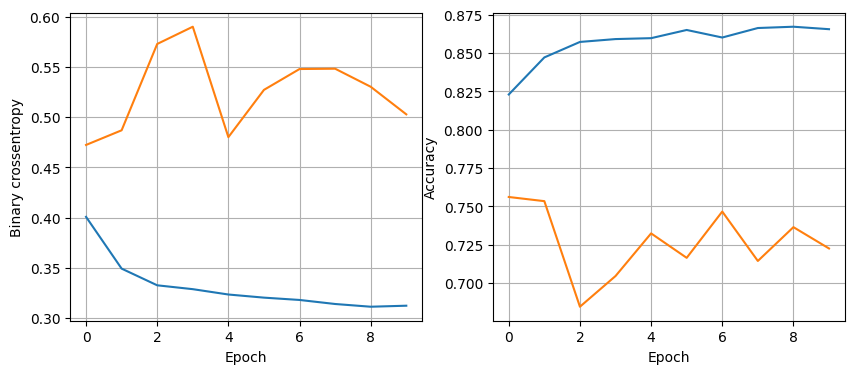

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8659
16 nodes, dropout 0, lr 0.01, batch_size 64


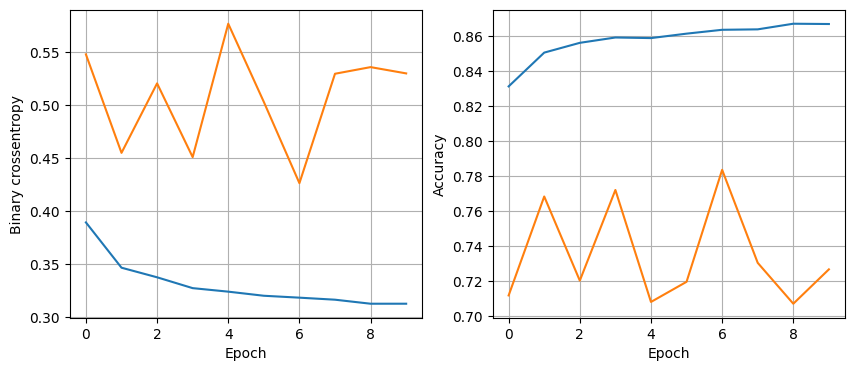

119/119 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8628
16 nodes, dropout 0, lr 0.01, batch_size 128


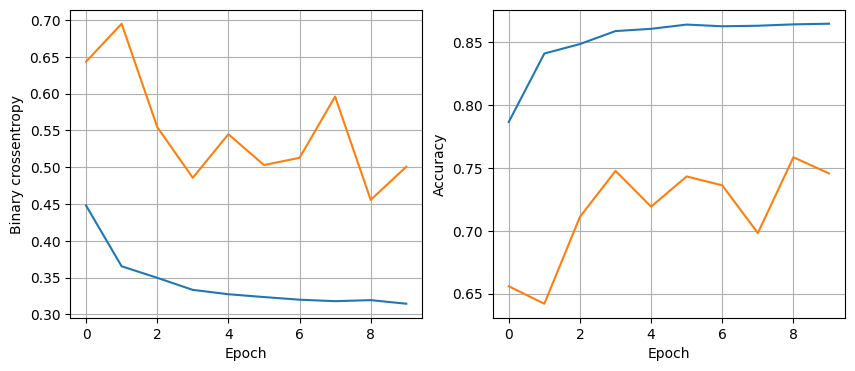

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.005, batch_size 32


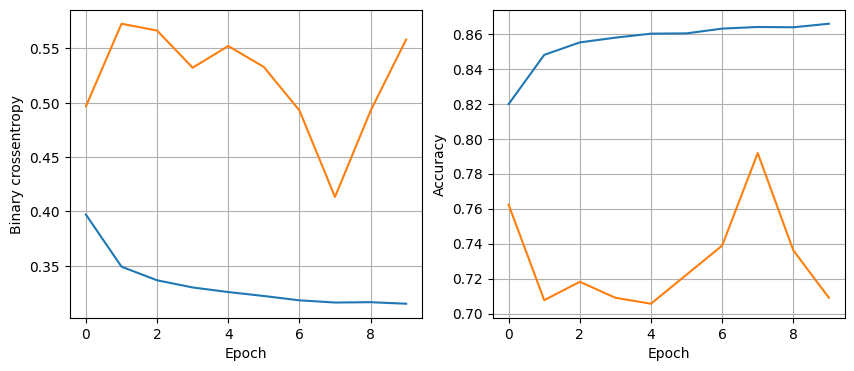

119/119 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.005, batch_size 64


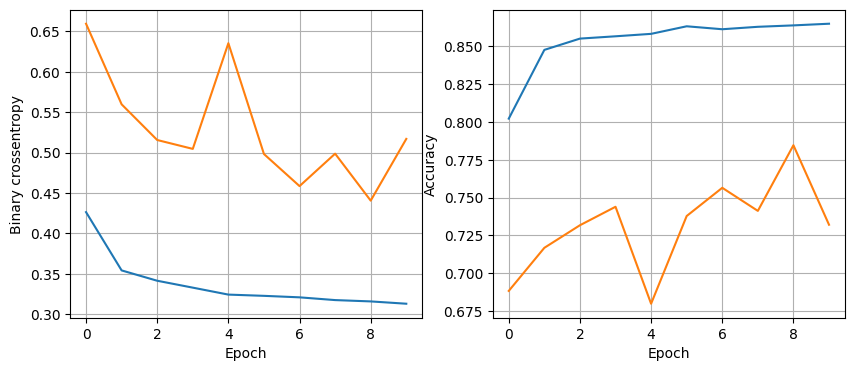

119/119 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch_size 128


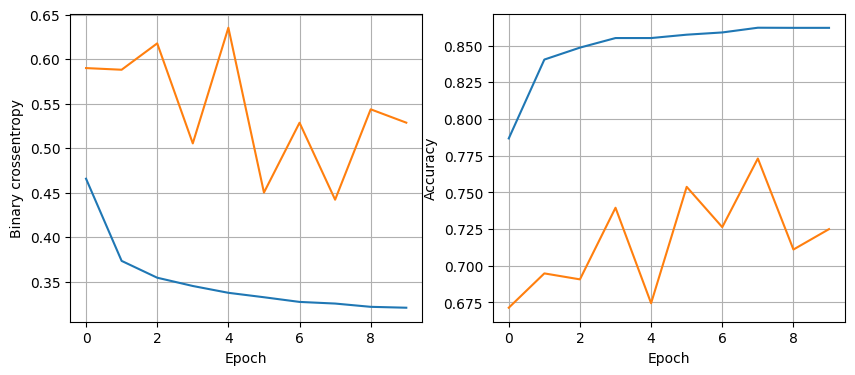

119/119 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8646
16 nodes, dropout 0, lr 0.001, batch_size 32


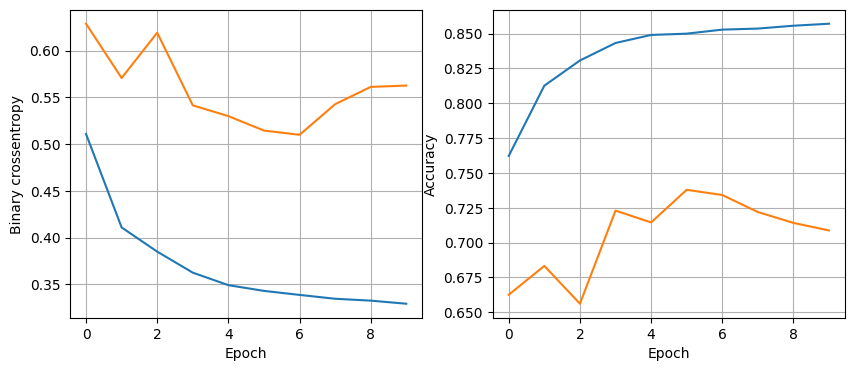

119/119 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8604
16 nodes, dropout 0, lr 0.001, batch_size 64


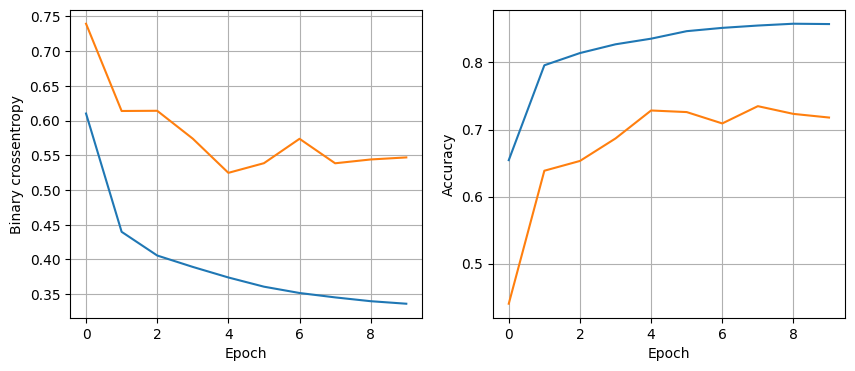

119/119 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.001, batch_size 128


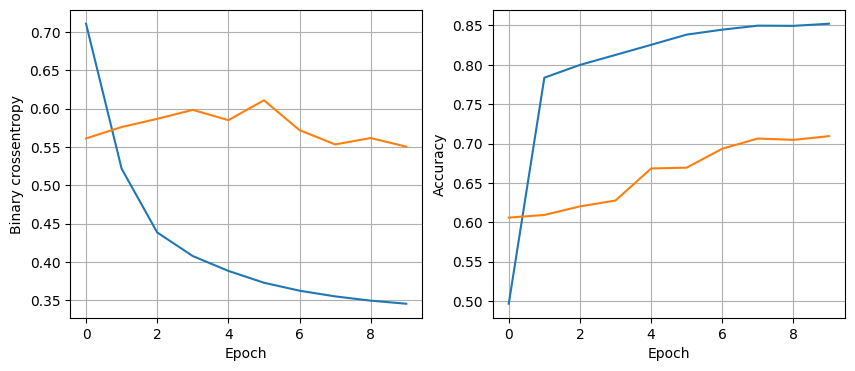

119/119 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8544
16 nodes, dropout 0.2, lr 0.01, batch_size 32


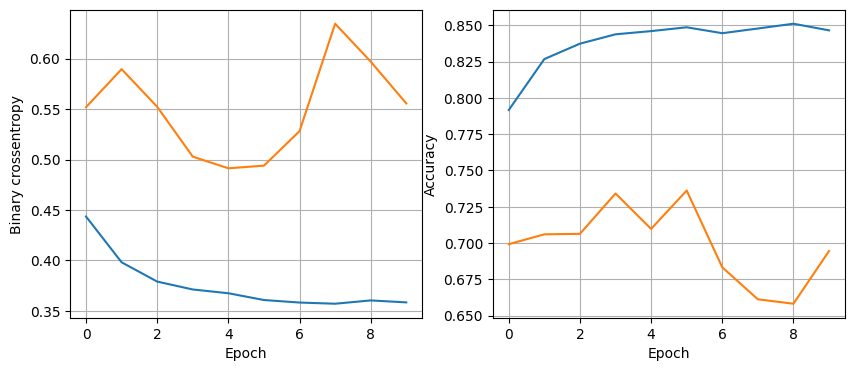

119/119 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch_size 64


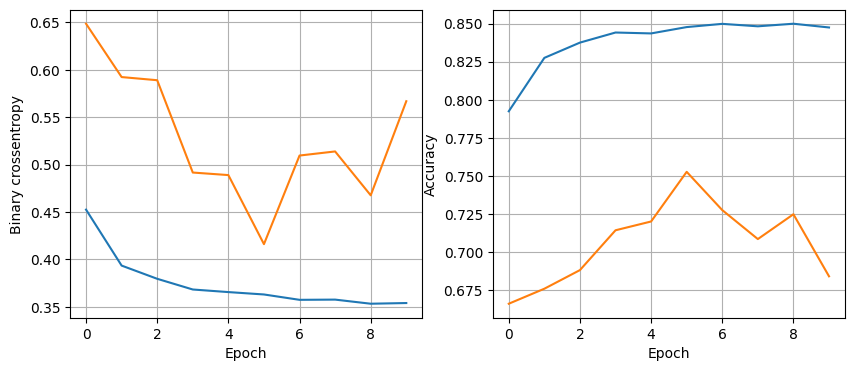

119/119 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8565
16 nodes, dropout 0.2, lr 0.01, batch_size 128


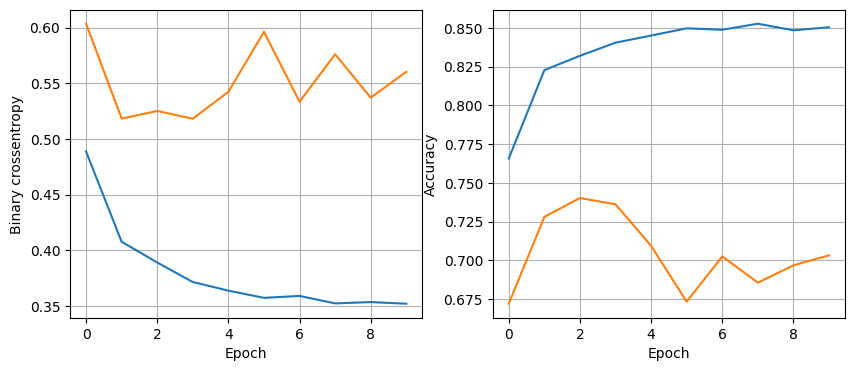

119/119 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.005, batch_size 32


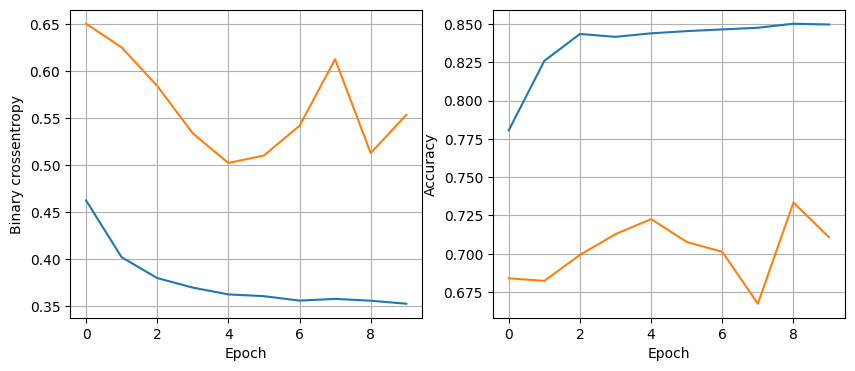

119/119 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8609
16 nodes, dropout 0.2, lr 0.005, batch_size 64


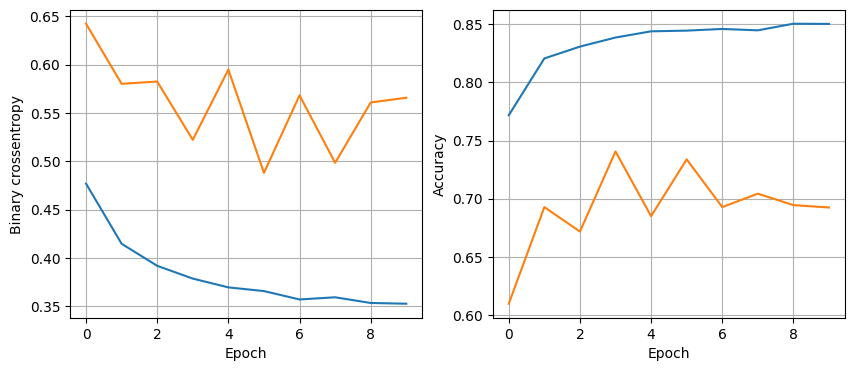

119/119 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.005, batch_size 128


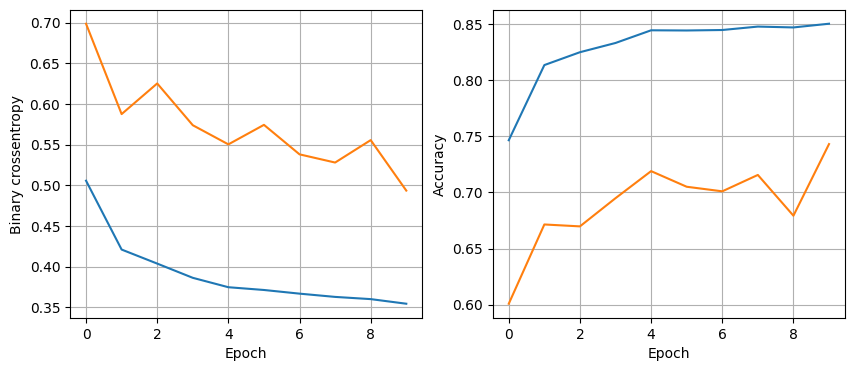

119/119 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8570
16 nodes, dropout 0.2, lr 0.001, batch_size 32


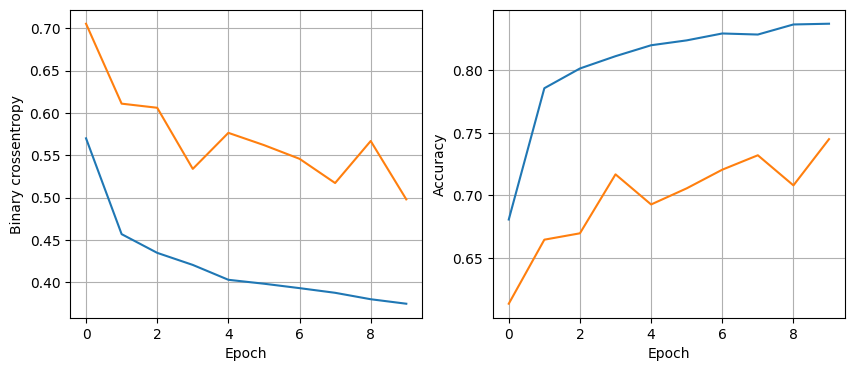

119/119 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8483
16 nodes, dropout 0.2, lr 0.001, batch_size 64


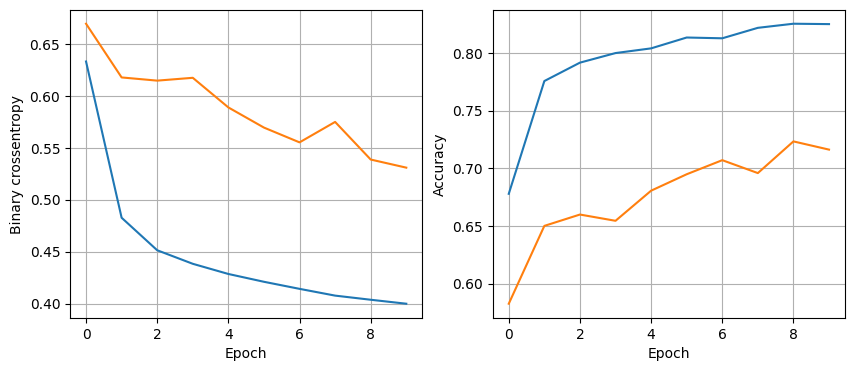

119/119 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8407
16 nodes, dropout 0.2, lr 0.001, batch_size 128


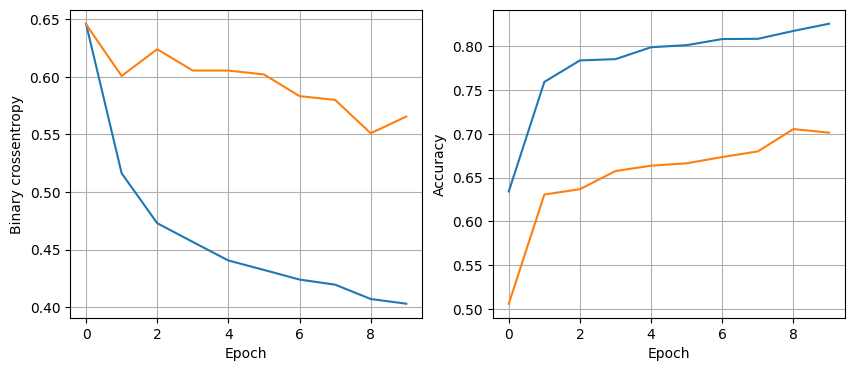

119/119 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8425
32 nodes, dropout 0, lr 0.01, batch_size 32


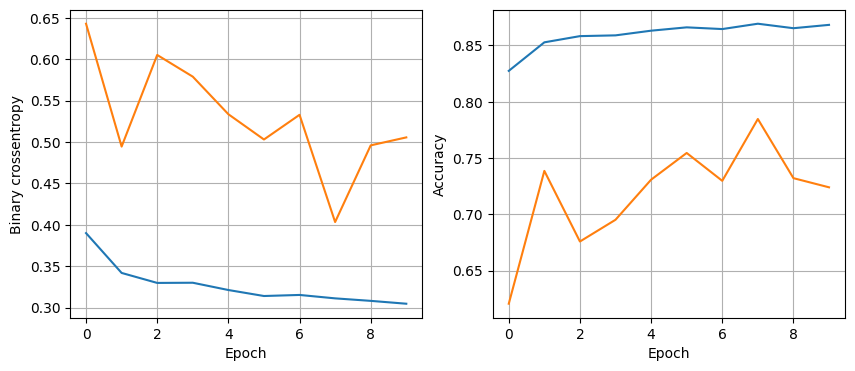

119/119 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.01, batch_size 64


In [ ]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 10
for num_nodes in [16, 32, 64]:
 for dropout_prob in [0, 0.2]:
  for lr in [0.01, 0.005, 0.001]:
    for batch_size in [32, 64, 128]:
      print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
      model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
      plot_history(history)
      val_loss = model.evaluate(X_valid, y_valid)[0]
      if val_loss < least_val_loss:
        least_val_loss = val_loss
        least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


In [ ]:
print(classification_report(y_test,y_pred))